Ashwin Saji

240984006

M.tech Data science

**Exp1:**
**Tutorial on TensorFlow, Keras, and Deep Learning Frameworks**

a. Install and set up TensorFlow and Keras in your environment (local system or cloud platform)

In [114]:
pip install tensorflow

In [115]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt

b. Explore
the
MNIST
dataset
and
understand
its
structure.

In [116]:
from keras.datasets import mnist

In [117]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print(f"Number of training samples: {len(train_images)}")
print(f"Number of test samples: {len(test_images)}")
print(f"Shape of training images: {train_images.shape}")
print(f"Shape of test images: {test_images.shape}")
print(f"Number of classes (labels): {len(set(train_labels))}")
print(f"Unique labels in the dataset: {set(train_labels)}")

Number of training samples: 60000
Number of test samples: 10000
Shape of training images: (60000, 28, 28)
Shape of test images: (10000, 28, 28)
Number of classes (labels): 10
Unique labels in the dataset: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


c. Use TensorFlow/Keras to load the MNIST dataset, preprocess the data
(normalization, reshaping, etc.), and visualize a few sample images with their
corresponding
labels.

In [118]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

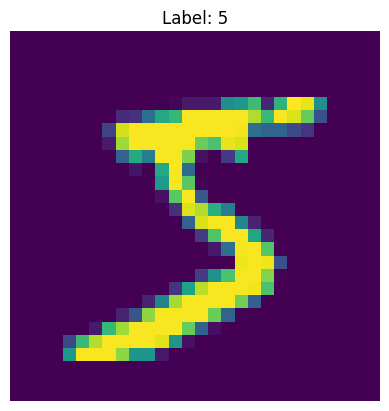

In [119]:
image_size=x_train.shape[1]
input_size=image_size**2
num_labels = len(np.unique(y_train))

image=x_train[0]
label=y_train[0]
plt.imshow(image, cmap='viridis')
plt.title(f'Label: {label}')
plt.axis('off')
plt.show()

In [120]:
# #normalization
# x_train, x_test = x_train / 255.0, x_test / 255.0

In [121]:
# #reshape to 1D array
# x_train = x_train.reshape(x_train.shape[0], input_shape)
# x_test = x_test.reshape(x_test.shape[0], input_shape)

In [122]:
# normalize and reshape
x_train = np.reshape(x_train, [-1, input_size])
x_train = x_train.astype('float32') / 255
x_test = np.reshape(x_test, [-1, input_size])
x_test = x_test.astype('float32') / 255

In [123]:
from keras.utils import to_categorical

In [124]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

 d. Create a basic feedforward neural network using Keras to classify the MNIST dataset
into
10
digit
classes
(0-9).

In [125]:
from keras.models import Sequential
from keras.layers import Dense,Activation

In [126]:
model=Sequential()
model.add(Dense(64,input_dim=input_size,activation='relu'))
model.add(Dense(32,input_dim=input_size,activation='relu'))
model.add(Dense(num_labels,activation='softmax'))
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_20 (Dense)                     │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 52,650 (205.66 KB)

 Trainable params: 52,650 (205.66 KB)

 Non-trainable params: 0 (0.00 B)

e. Train the model, evaluate its performance, and visualize the loss and accuracy curves.

In [127]:
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

In [128]:
history=model.fit(x_train,y_train,epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.8570 - loss: 0.4927
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9594 - loss: 0.1336
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9717 - loss: 0.0928
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9774 - loss: 0.0733
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9818 - loss: 0.0595


In [129]:
loss, acc = model.evaluate(x_test, y_test, batch_size=10)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9666 - loss: 0.1035

Test accuracy: 97.2%
